# Forecasting initial notebook

Forecasting, relatively young science, has been growing in importance of the years, with more and more elegant mathematical structures and driven by a growing desire to optimise various aspects of life.

Although forecasting has it's critics, citing concerns of over-optimization, leading to the accumulation of small crisis into huge ones, or the bias of one's attitude towards the future, it is generally accepted that it's a very important tool for businesses, governments and individuals.

In this report, we will be using a dataset that was provided by Balena ltd, a leading startup in the area of Internet of Things.


# The Data Set

## Use-case background
Although the course does provides a sample data-set, it is advised that we used data from our current companies (this is an executive training program after-all) and I am fortunate enough that I have been employed as a Product Analyst at balena.io for the last couple of months. Thus, after some internal discussion, we identified a use-case that has two important characteristics:

1. It is a low-impact field, thus any mental bias that might effect the team due to a wrong forecast will have little-to-none business effects.
2. It is an interesting field that might prove useful.

## balena.io

Before we delve into the use-case, it is pertinent to describe, on a high-level, the platform which produces the data-set that we will use.

Balena.io is a company that reduces friction for fleet-owners, people who develop applications and deploy code on a fleet of IoT devices.

In order to do that, we we have brought several paradigms of the cloud-native development to the world of embedded Linux devices. In essence, users use our platform to manage their devices.

Each and every device that is managed by balena-cloud (the core product) and runs BalenaOS, must connect to our back-end server, so that it can be managed remotely.

## Use case
We will forecast the number of online devices on a daily basis, as seen by our internal VPN. This data-set can further be enhanced with metadata for further analysis. The data-set is set between 2016 and 2018, while a small-dataset of out-of-sample devices will be used to benchmark the forecast.

In essence, the data-set is a set of online and offline events for each device, at specific time-stamps. Since there is a number of different VPN servers that the devices could connect to, there is some added complexity regarding the detection of the time for which the device stayed online, but this will be analysed as part of the project.

## Disclaimer
> The data are completely anonymized and thus it's impossible to correlate them to any prior or existing customer.

## Goal
The project has two goals:

1.  Fulfill the requirements of the course's project and serve as a real-life testbed for the course's forecasting material
2. Create a model to forecast the number of online devices on a daily-and perhaps hourly basis- so that our engineers can better anticipate the server load, ensuring both quality of service and reducing cost at the same time.

In [ ]:
# Table of Contents


# Forecast

## Pre-processing

The raw-data set that can be found in the production servers consists of a set of `online` and `offline` events that devices register everytime they connect and disconnect to our VPN servers. What we did, was to prune the database of all these events and log a *daily* `online` event for each device.

This new data-set, which is the one that we actually processed for this project, is a simple table with 3 collumns:
 - Date
 - Device_ID
 - organization_ID

In essence, it logs every device that has appeared as `online` for some time in the course of a day. Thid device has a **unique** `device_id` and it belongs to an organization which has a unique `organization_id`. Many devices can belong to the same organization.

We mainly considered the time-series without taking into consideration any meta-data, since what we primarily care is to anticipate the total load that our servers should expect at any given day.

## Programming Environment

We chose to use Python as the main programming language for this forecasting project in order to get acquanted with the statistical and forecasting libraries that Python has to excibit. In the end, python is not deemed on par with `R`, as it lacks the robustness of the libraries that exist for R, and the user has less building blocks out-of-the-box in order to structure his experiment or make deductions from the results. In general, it felt like an uphill-battle and the next iterations of this project will most surely be conducted in an `R` environment.

It is worth noting, that due to the rapid development of AI and neural network and their use in various applications, python has the most wide array of libraries for machine-learning, making it ideal for the use and development of complex neural networks or machine-learning and pattern recognition algorithms.

In general, the conclusion would be the use of both `R` and `python` to tackle the same problem, leveraging the power of each tool for different parts of the solution. This teaching has been invaluable and we feel that the invested time was worth it.

We start by importing the data from `csv` format into a `pandas dataframe`. `Pandas` is a library used mainly for scientific purposes and it allows the use of R-like data-structures, like a `DataFrame`.

In [92]:
import pandas as pd 
col_names = ["date", "device_id", "org_id"]
data = pd.read_csv("analytics_devices_online.csv", names = col_names, header=None) 
print("The size of the data is: ", data.size, "entries")

The size of the data is:  19647156 entries


We then proceeed to count the number of online devices each day, transforming the `date` entry, from a `string` to a `Datetime` object for easier handling throughout the project.

In [91]:
from datetime import datetime
import matplotlib.pyplot as plt

format = '%Y-%m-%d'
# data['date'] is the column with all the dates
data['date'] = pd.to_datetime(data['date'])
df = data.groupby('date').count()
del df['org_id']
df = df.rename(columns={'device_id': 'device_count'})
print("The number of days in the data structure is:", df.size, "days")
df.head()

The number of days in the data structure is: 1357 days


,device_count
date,
2015-07-14,53
2015-07-15,53
2015-07-16,56
2015-07-17,57
2015-07-18,57


As we are curious, we want to explore the data, thus we want to test whether we can find a corellation between organization and number of online devices per day.

We proceed to organize the data per `organization` and per `datetime` and then plot for each organization, the number of **online devices** per day for the entire duration of the time-series.

In [30]:
from datetime import datetime
import matplotlib.pyplot as plt

format = '%Y-%m-%d'
# data['date'] is the column with all the dates
data['date'] = pd.to_datetime(data['date'])
gb = data.groupby('org_id')    
orgs = [gb.get_group(x) for x in gb.groups]


In [18]:
ml_orgs = data.groupby(['date', 'org_id']).count().reset_index()



del ml_orgs['date']
print(ml_orgs)
ml_orgs = data.groupby(['device_id']).sum()
print(ml_orgs)

ml_orgs.drop_duplicates(subset='org_id', keep = False, inplace = True)
ml_orgs = ml_orgs.reset_index()
ml_orgs = ml_orgs.rename(columns={'device_id': 'device_count'})
print(ml_orgs)

# print(ml_orgs)

# f = plt.figure(figsize=(19, 15))
# cor = ml_orgs[['date', 'org_id', 'device_count']].corr()
# print(cor)
# plt.matshow(cor, fignum=f.number)
# plt.xticks(range(ml_orgs.shape[1]), ml_orgs.columns, fontsize=14, rotation=45)
# plt.yticks(range(ml_orgs.shape[1]), ml_orgs.columns, fontsize=14)
# cb = plt.colorbar()
# cb.ax.tick_params(labelsize=14)
# plt.title('Correlation Matrix', fontsize=16);

        org_id  device_id
0          922         10
1         7805          1
2        22645          1
3        22998          1
4        23047          1
...        ...        ...
663698   52579          1
663699   52580          1
663700   52584          1
663701   52585          1
663702   52590          3

[663703 rows x 2 columns]
            org_id
device_id         
1132        317694
1148       2402386
1282       2897748
1315         22645
1474         23232
...            ...
1579188       9000
1579189      41036
1579190      43340
1579191       9000
1579192       9000

[114495 rows x 1 columns]
       device_count   org_id
0              1132   317694
1              1148  2402386
2              1282  2897748
3              1315    22645
4              9742   238240
...             ...      ...
24295       1579167    52584
24296       1579168    52579
24297       1579172    52585
24298       1579179    35608
24299       1579186    22127

[24300 rows x 2 columns]


Before we proceed, to elect to perform a scatter plot and try a simple linear regression. The regression does not provide any meaningful result, thus for the time being we won't take the `organization id` into consideration for the rest of our analysis.

It is of interest though to create a graph of all the organizations and the number of `online devices` each organization had, this graph will show us our most loayal customers and also it indicates that most customers that started with balena early on, they have increased their fleets over time. The total trend of increasing the number of `onlien devices` per `organization` while the time passess, shows that balena is indeed not only solving a problem some customers have, but it solves it in an increasingly good manner, creating satisfied customers with high `upselling` potential.

Length of orgs: 11921


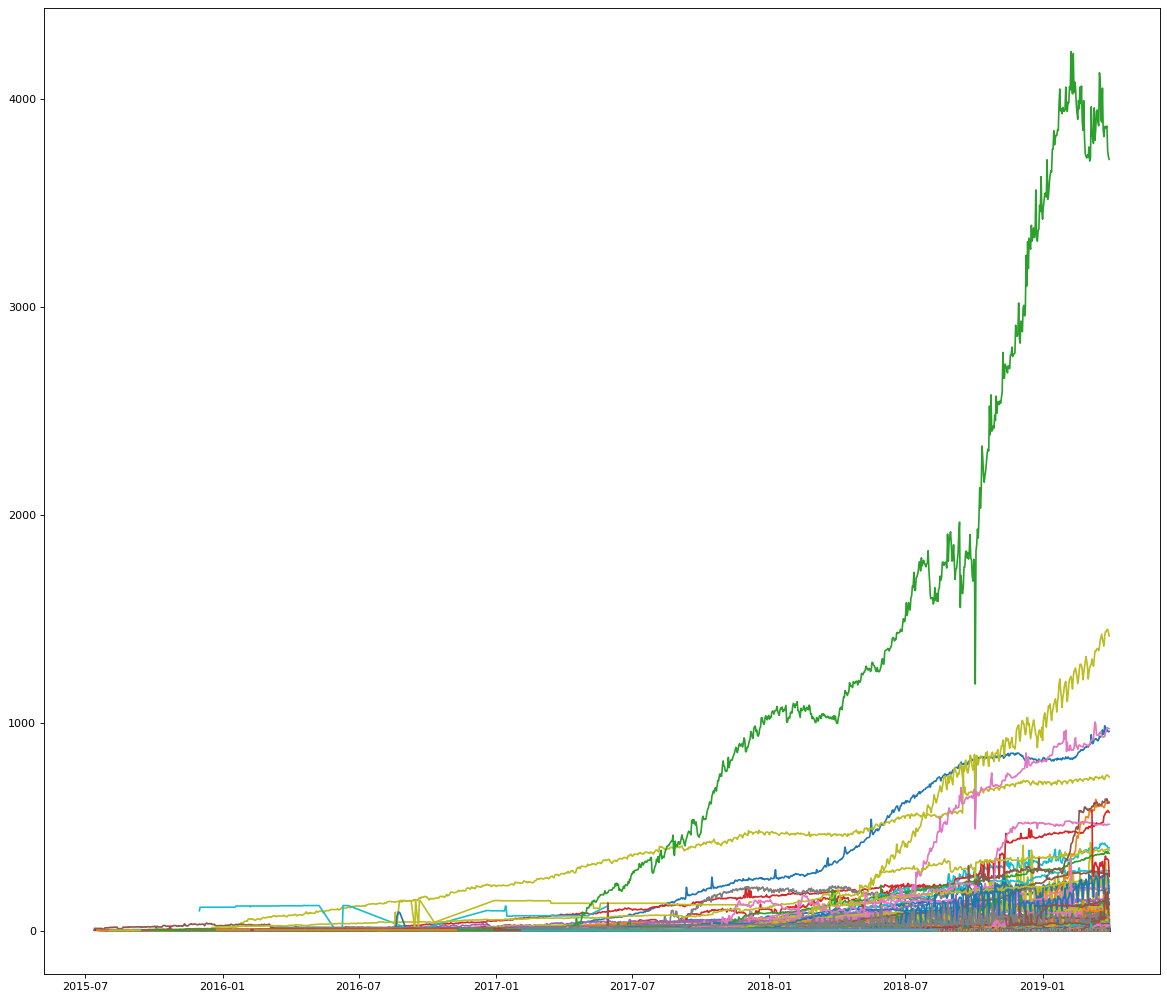

        date  org_id  device_count
0 2019-03-31   52590             3
              date  device_id  org_id
241690  2017-05-16     580758      61
274824  2017-06-15     580758      61
342293  2017-05-15     580758      61
346080  2017-05-23     580758      61
353070  2017-05-18     580758      61
...            ...        ...     ...
6546473 2019-03-31    1457280      61
6547132 2019-03-31    1078786      61
6547467 2019-03-31    1577379      61
6547791 2019-03-31     946507      61
6548122 2019-03-31    1574983      61

[7580 rows x 3 columns]
              date  device_id  org_id
44604   2016-06-02     185718       7
53958   2016-07-18     185718       7
60661   2016-05-31     185718       7
61038   2016-07-14     185718       7
61456   2016-08-03     202488       7
...            ...        ...     ...
6548398 2019-03-31     994574       7
6548726 2019-03-31    1313057       7
6548727 2019-03-31    1175541       7
6548728 2019-03-31    1043246       7
6548729 2019-03-31    1441998  

In [40]:
print("Length of orgs:", len(orgs))

fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

for org in orgs:
    count_org= org.groupby(['date', 'org_id'], sort = True).count().reset_index()
    count_org = count_org.rename(columns={'device_id': 'device_count'})
    plt.plot(count_org['date'], count_org['device_count'])
    

plt.show()    
print(count_org)
print(orgs[45])
print(orgs[0], orgs[-1])

## Daily Sum

We continue the analysis by plotting the daily sum of `online devices` for each day throughout our dataset. For now, this is to give us a first glimpse of the data-set, but actually is going to help as a lot when we choose the type of `decomposition` that we want to perform.

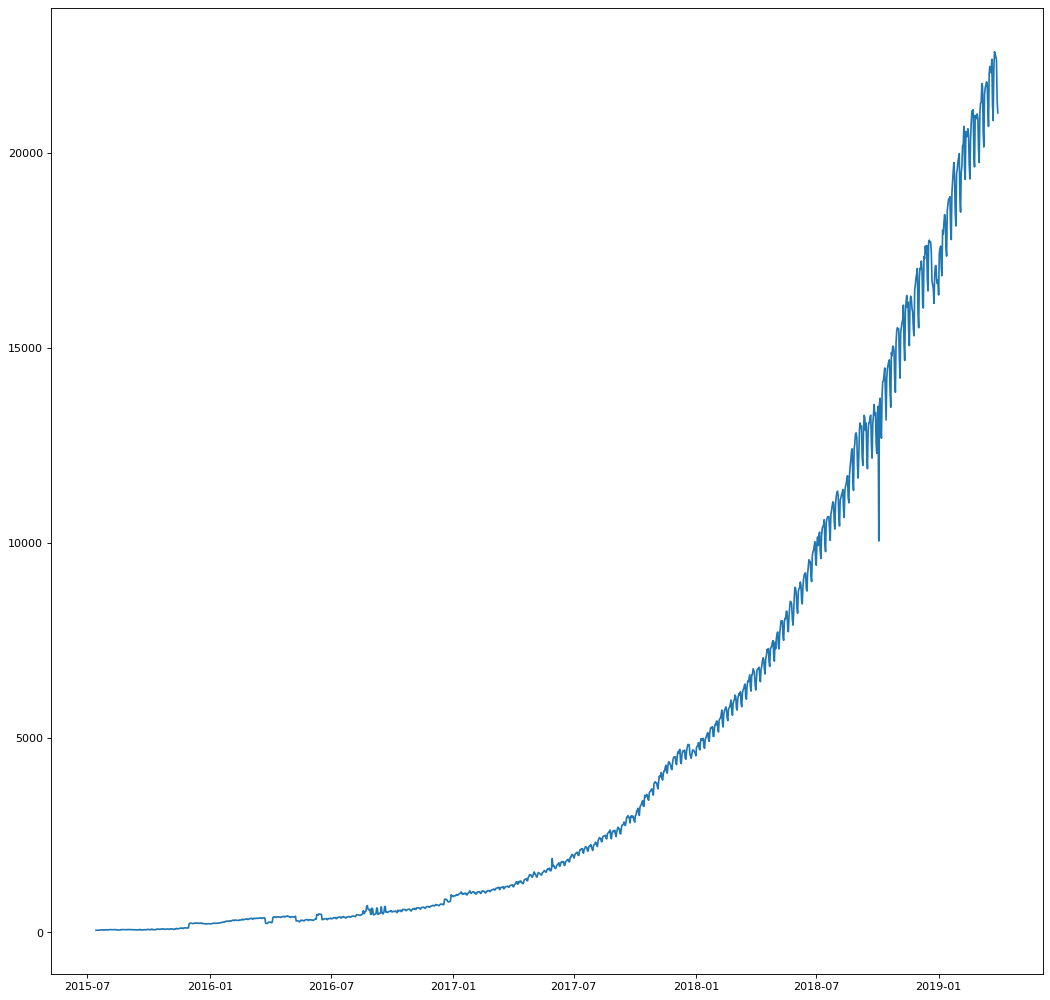

In [98]:
fig=plt.figure(figsize=(16,16), dpi= 80, facecolor='w', edgecolor='k')

plt.plot(df.index, df['device_count'])

## Monthly Mean

We continue the analysis by grouping or data and looking at the `monthly mean` number of `online devices`. We are interested for the mean because it shows and verifies our preliminery conclusion from the earlier graph, that indeed the mean number of `online devices` is increasing, as we recruit more customers and existing customers increase the size of their fleet.

These analyses are **not** directly related to the forecasting project, but they offer a very good insight into the data, while we got more comfortable with the data-set and python as the tool to handle our data.

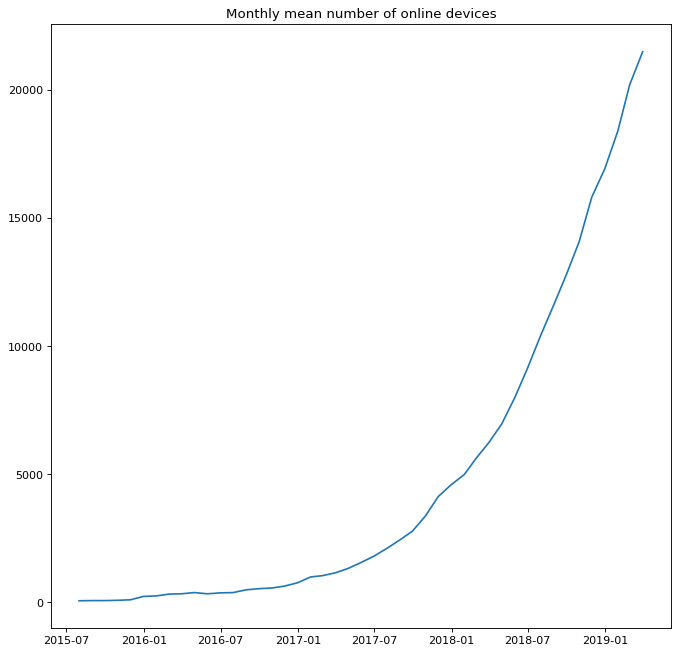

In [99]:
fig=plt.figure(figsize=(10,10), dpi= 80, facecolor='w', edgecolor='k')

df_msum = df.groupby(pd.Grouper(freq='M')).sum()
df_mmean = df.groupby(pd.Grouper(freq='M')).mean()
df_wmean = df.groupby(pd.Grouper(freq='W')).mean()
plt.title("Monthly mean number of online devices")
plt.plot(df_mmean)


## Monthly Sum

We can also plot the monthly sum of online devices, propably not very helpful, but the more visualisation points we have about the data-set, the more easier is to develop an intuition over the characteristics of our data.

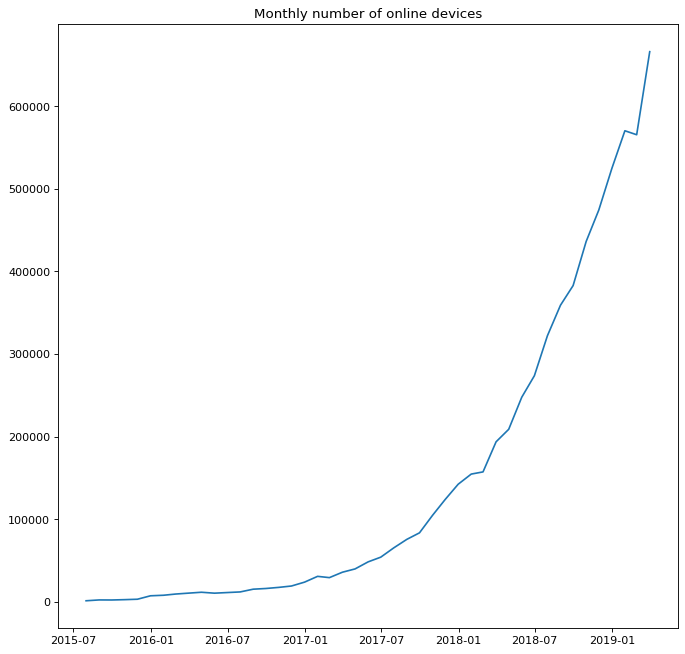

In [54]:
fig=plt.figure(figsize=(10,10), dpi= 80, facecolor='w', edgecolor='k')

plt.title("Monthly number of online devices")
# plt.plot(df_msum)
plt.plot(df_msum)

# Series Decomposition

In order to decompose the data, we  have to choose between `multhiplicative` and `additive` seasonality type. We assume that **trend** follows the type of the **seasonality**. In order to do that, there are a couple of methodologies, which start with a visual understanding of the data and then a verification of the assumption using advances techniques.

The data show that they have a `seasonality` that increases as the `trends` increases, especially after 2018 where the slope of the number of `online devices` increases, this can be shown with the graph bellow, which is the exact same that was shown previously. Morever, combining with the fact that the seasonality is greatly suppresed in the `monthly sum` and `monthly mean` graphs above, we deduce that the `seasonality` is **not** *monthly* but rather *weekly*.


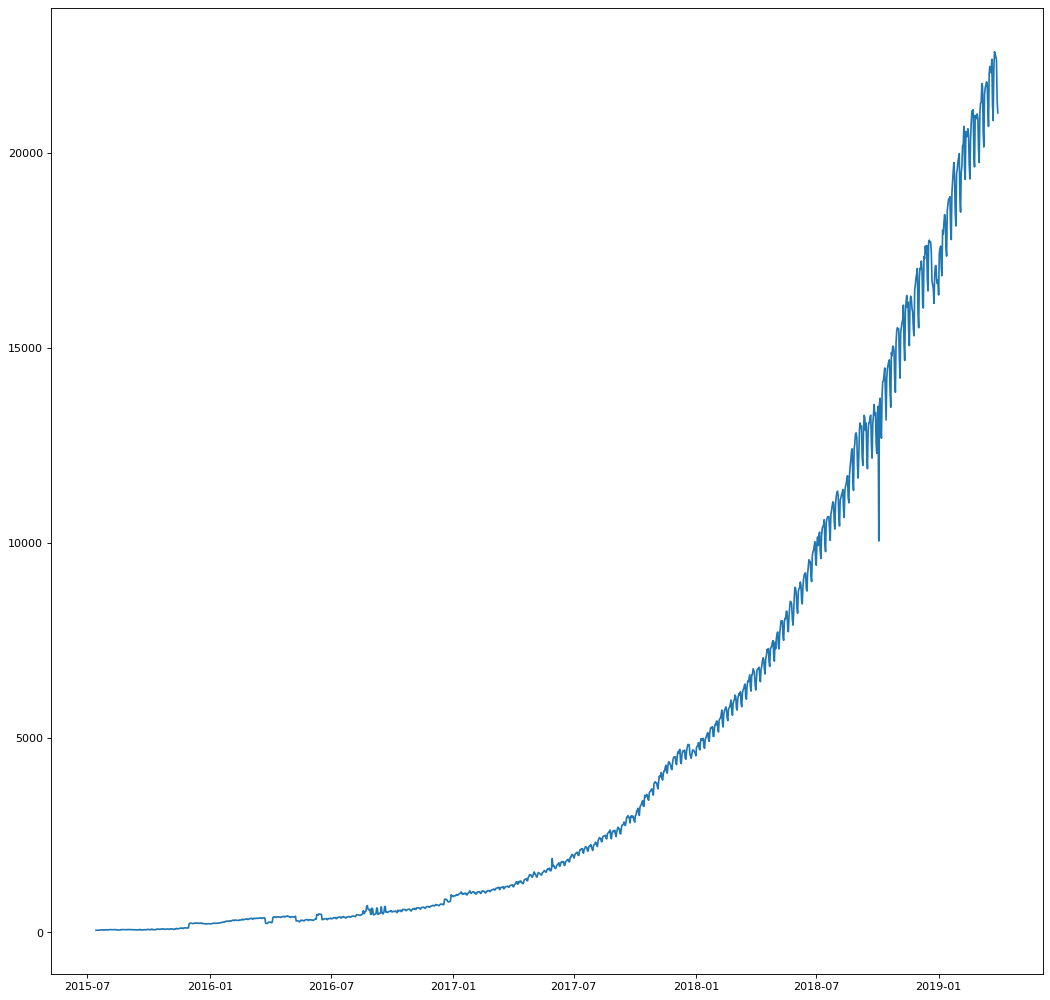

In [100]:
fig=plt.figure(figsize=(16,16), dpi= 80, facecolor='w', edgecolor='k')

plt.plot(df.index, df['device_count'])

We use the `statsmodels` library in order to perform both `decompositions`, `multiplicative` and `additive`, but in our analysis we will use the former.

<Figure size 1296x1152 with 0 Axes>

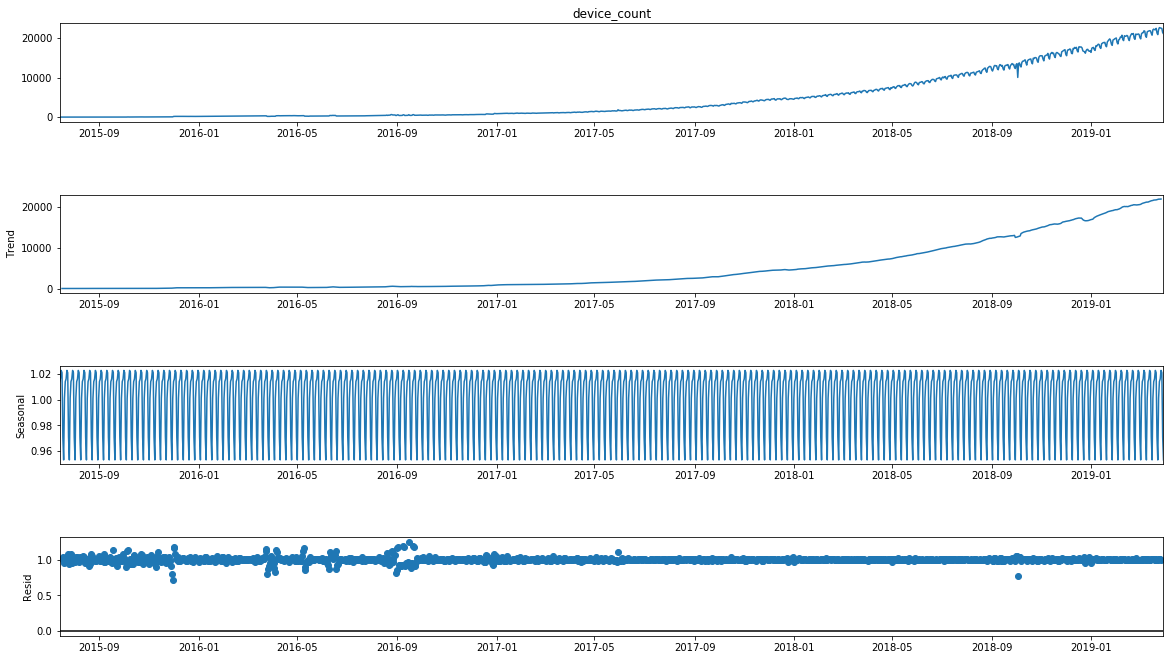

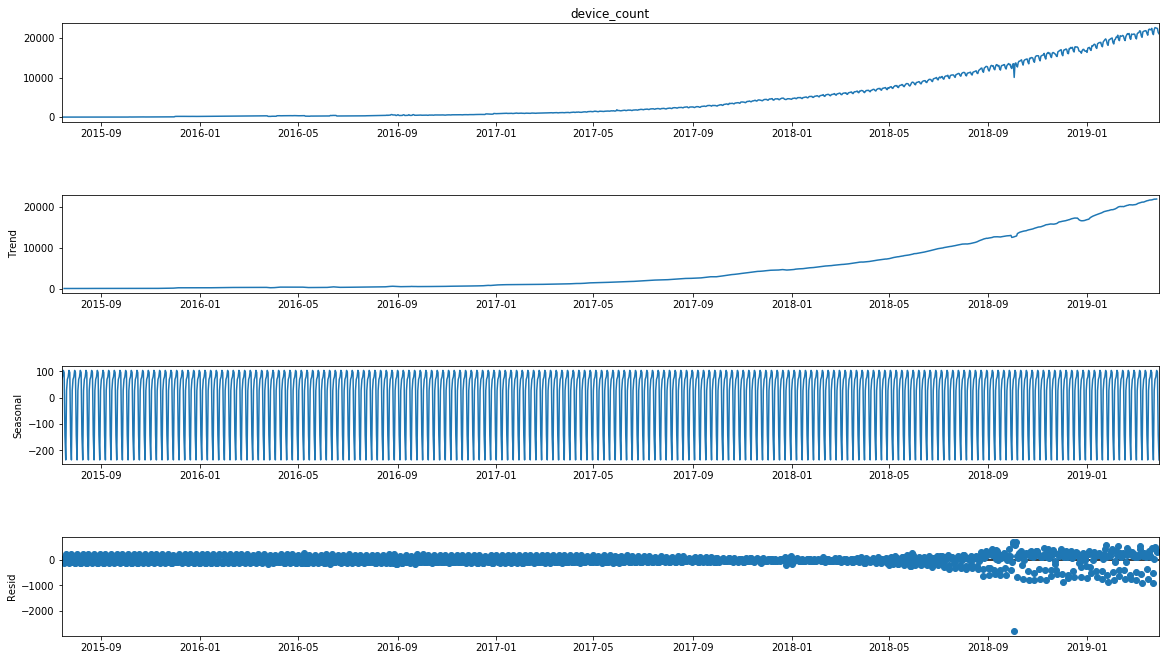

In [102]:
from statsmodels.tsa.seasonal import seasonal_decompose

plt.figure(figsize=(18, 16))

offset = 0
series = df["device_count"][offset:]
dec_m = seasonal_decompose(series, model='multiplicative')
dec_a = seasonal_decompose(series, model='additive')


dec_m.plot().set_size_inches(18.5, 10.5)
dec_a.plot().set_size_inches(18.5, 10.5)

## Analysing weekly seasonality

At this point of the analysis, we really want to detect the exact form of the weekly seasonality, and most importantly the peaks. We find that no single day pass the the `0.9 percentile`, meaning that the seasonality is very mild. Indeed, we do some analysis and we find that if we set the `percentile` to `0.85`, the count of days that pass through the percentile is almost uniform throughout the week, with a slight edge towards the center of the week (Tuesday - Thursday).

This is very interesting for two reasons:

1. It means that in our analysis decomposition perhaps is not very important, and from an informational point of view it would perhaps be better to handle the raw time-series, since it won't have any uncertaintt that might be generated due to the transformation of the decomposition.
2.  From a business perspective, we know that the users of the platforms are either companies that manage their fleets or hobbyists who use our platform to easily build projects based on platforms such as the Raspberry pi. Since we can safely assume that the latter group will mainly operate during the weekends, this seasonality shows that the former group (companies for professional use) have a far greater affect on our systems than the hobbyists.

In [171]:
### from statsmodels.tsa.seasonal import seasonal_decompose
import calendar

up = 7
seasonal_m = dec_m.seasonal
# seasonal_a = dec_a.seasonal
q = seasonal_m.quantile(0.85)
print('Q:', q, '\n')
i = 0
days = []
workdays = list(calendar.day_abbr)

# clipped = seasonal_m[offset:offset + up].clip(lower=q)
# print (clipped)


# Because the change is insignificant, we lose that in the conversion that happens
# in the inequality
for day in seasonal_m[offset:offset + up]:
    # print(day)
    if float(day) > float(q):
        day_int = df.index.date[offset+i].weekday()
        # print(workdays[day_int])
        days.append(workdays[day_int])
        i = i + 1

days = np.asarray(days)
(unique, counts) = np.unique(days, return_counts=True)
frequencies = np.asarray((unique, counts))
print(frequencies)






Q: 1.021184504972818 

[['Tue']
 ['1']]


2015-07-14 : Tue (1)  
Seasonal Component: 1.0142479376200055
2015-07-15 : Wed (2)  
Seasonal Component: 1.0163130550802153
2015-07-16 : Thu (3)  
Seasonal Component: 1.0229558131660368
2015-07-17 : Fri (4)  
Seasonal Component: 1.021184504972818
2015-07-18 : Sat (5)  
Seasonal Component: 0.9709919640355095
2015-07-19 : Sun (6)  
Seasonal Component: 0.9530994714733424
2015-07-20 : Mon (0)  
Seasonal Component: 1.001207253652072


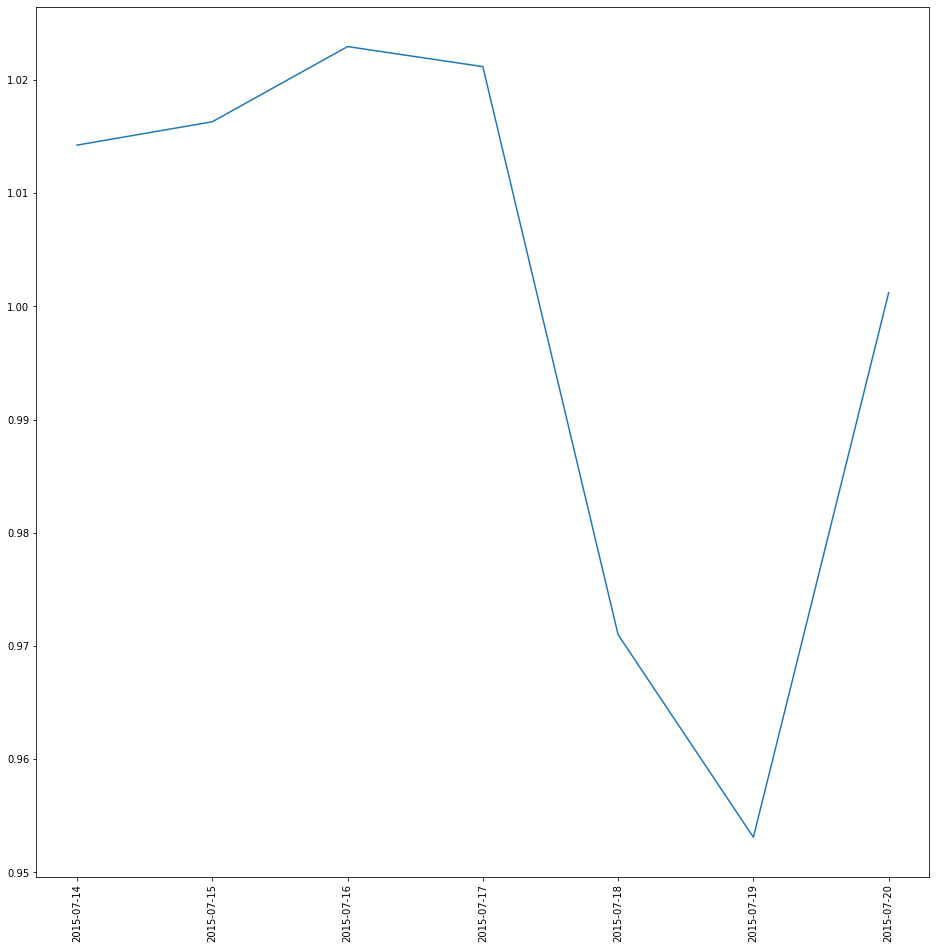

In [173]:
# print 1 month of seasonality

# Datetime integer to workday: monday = 0, Sunday = 6

plt.figure(figsize=(16,16))
plt.plot(df.index.date[offset:offset + up], seasonal_m[offset:offset + up])
plt.xticks(rotation = 'vertical')
i = 0
for day in seasonal_m[offset:offset + up]:
        day_int = df.index.date[offset+i].weekday()
        print( str(df.index.date[offset+i]) + " : " +  str(workdays[day_int]) + ' (' + str(day_int) + ') ', "\nSeasonal Component:", day)
        i = i + 1


1


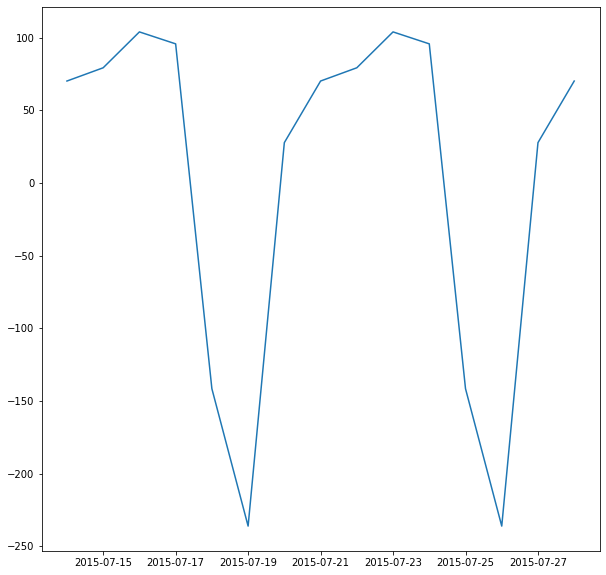

In [175]:
# We print here 2 weeks
plt.figure(figsize=(10,10))
plt.plot(df.index.date[0:15], seasonal_a[0:15])
print(df.index.date[0].weekday()) # monday = 0, Sunday = 6

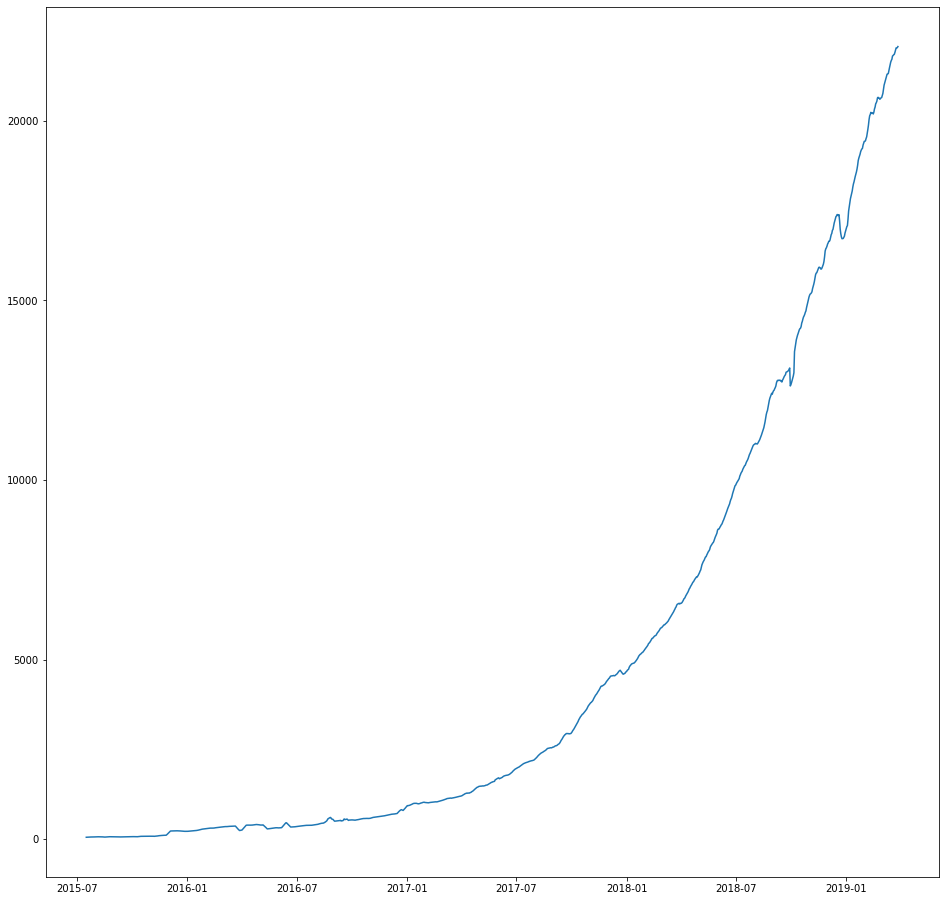

In [177]:
# We print here the trend of the decomposed time series
plt.figure(figsize=(16,16))
trend_m = dec_m.trend
trend_a = dec_a.trend
plt.plot(trend_m)
# plt.plot(trend_a)

## Takes

What we see from the prior decomposition is that the number of online devices per day, has a very strong trend that resembles the hokey stick, something that is very positive for the business. This means that the number of `online devices` is starting to rise exponentially, which means that the business is picking up and customers are increasing, while also the existing customer possibly activate more and more devices.




## Fb Prophet

Before we proceed, we choose to test a *forecasting library* named `Fbprophet`, as the name says, it is developped by `facebook` and the goal is to have an easy to operate `library` which you can use in order to make quick and accurate forecasts. It is thorougly described in a related [publication](https://peerj.com/preprints/3190/).

As we read from the project's website:
> Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

We run the library with a simple forecasting model, meaning that we define the whole dataset as `fitting dataset` while leaving only the last 157 samples as `test dataset` to verify the accuracy of the library. Moreover, we define `daily` seasonality and run the forecast using the core function. As underlined in the documentation, this library is intended to be used as a *fire and forget* toolkit for data scientits, rather than a forecasting methodology that can be carefully modified for the particular problem at hand.

INFO:fbprophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.


<Figure size 1152x1152 with 0 Axes>

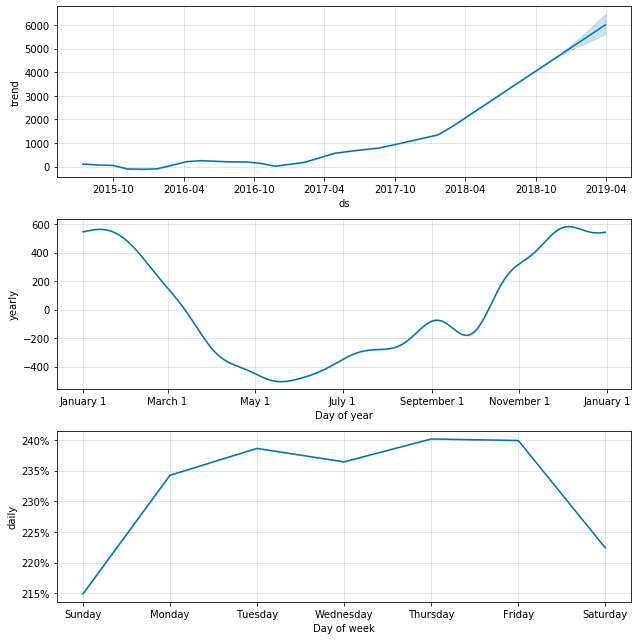

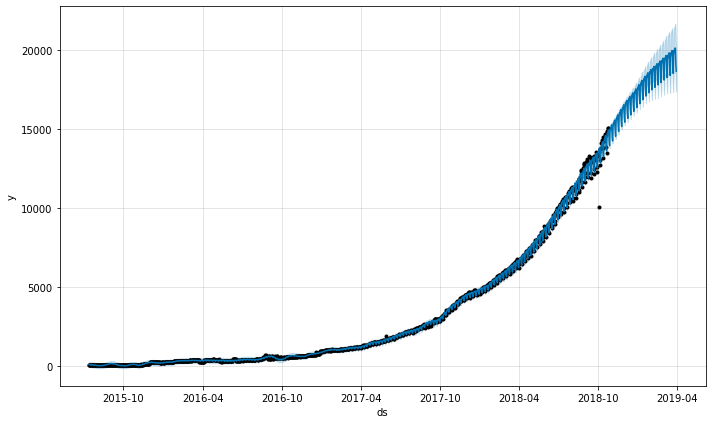

In [236]:
from fbprophet import Prophet
import pandas as pd
from fbprophet.diagnostics import cross_validation, performance_metrics, cross_validation_metric
plt.figure(figsize=(16,16))


# limit = 1357
# Fitting period limits
upper_bound = 1200
lower_bound = 0
forecast_horizon = 157

train_sample = pd.DataFrame({'y': df['device_count'][lower_bound:upper_bound], 'ds': df.index[lower_bound:upper_bound] })
train_sample = train_sample.reset_index()
del train_sample['date']
train_sample.head()

test_sample = df['device_count'][upper_bound:]

p = Prophet(weekly_seasonality=False, changepoint_prior_scale=0.1)
p.add_seasonality(name='daily', period=7, fourier_order=15, mode = 'multiplicative')

p.fit(train_sample)
future = p.make_future_dataframe(forecast_horizon, freq='D')

forecast = p.predict(future)
fig = p.plot_components(forecast)
fig1 = p.plot(forecast)


# print(forecast)


## Measuring the accuracy of fbprophet
After running the forecast, we want to test the accuracy of it. We proceed to define a set of testing functions that will be used throughout this project, while also we leverage the in-house functionality of the library.

For our own testing toolkit, we use `SMAPE`, `(R)MSE` and lastly we compute the `logarithm` of `Actual/Forecast` and plot it for the entire testing period. The computed errors are not very bad, with a **5.5%** `SMAPE`, but we want to test it some more and perhaps optimise. What we see is that our data-set changes trend at the end of **2017**. From the plots it's quite obvious that the exponential increase is greatly accelerate arround the start of 2018, perhaps because we released a core feature or perhaps because the core mass of customers exceeded a level and boosted the word of mouth. Whatever it may be, the `trend` changes, thus we believe that the old `trend` may in fact contaminate the forecasting function, since the function tries to fit to a `trend` that is no longer relevant.

Thus, after performing our test analysis for this forecast, we proceed to define *3 different fitting periods** and forecast for all of them. We indeed find some very promising findings, more on that later.

Error for a forecast horizon of 157 samples
RMSE: 1243.952727873351
MSE: 1547418.3891835515
MAE: 982.932042201047
SMAPE Error: 5.137665556562615%
MAPE Error: 4.958628317255741%
Mean log error:  0.04682002262072623


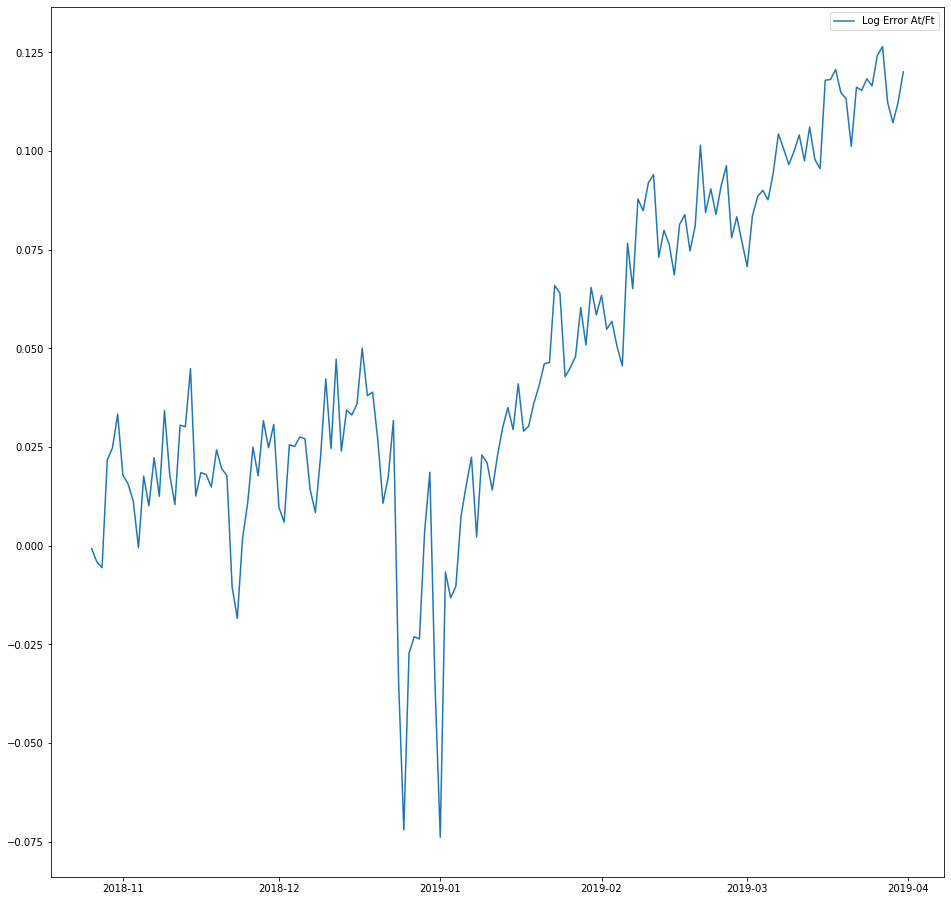

In [280]:
# Test suite

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.figure(figsize=(16,16))


yhat = forecast['yhat'][upper_bound - lower_bound:]
yhat = np.asarray(yhat)
test_array = np.asarray(test_sample)


print("Error for a forecast horizon of", forecast_horizon, "samples" )

mse = mean_squared_error(test_array, yhat)
mae = mean_absolute_error(test_array, yhat)
print("RMSE:", np.sqrt(mse))
print("MSE:", mse)
print("MAE:", mae)

def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

smape = smape(test_array, yhat)
mape = mean_absolute_percentage_error(test_array, yhat)
print('SMAPE Error:', str(smape) + '%')
print('MAPE Error:', str(mape) + '%')

def log_err(A, F):
    return (np.log(A/F))


log_error = log_err(test_array, yhat)
plt.plot(forecast['ds'][upper_bound - lower_bound:], log_error, label = "Log Error At/Ft") 
plt.legend()

print( "Mean log error: ", np.mean(log_error))

## Fbprophet Performance Metrics

> Prophet includes functionality for time series cross validation to measure forecast error using historical data. This is done by selecting cutoff points in the history, and for each of them fitting the model using data only up to that cutoff point. We can then compare the forecasted values to the actual values. This figure illustrates a simulated historical forecast on the Peyton Manning dataset, where the model was fit to a initial history of 5 years, and a forecast was made on a one year horizon.

> This cross validation procedure can be done automatically for a range of historical cutoffs using the cross_validation function. We specify the forecast horizon (horizon), and then optionally the size of the initial training period (initial) and the spacing between cutoff dates (period). By default, the initial training period is set to three times the horizon, and cutoffs are made every half a horizon.
The output of cross_validation is a dataframe with the true values y and the out-of-sample forecast values yhat, at each simulated forecast date and for each cutoff date. In particular, a forecast is made for every observed point between cutoff and cutoff + horizon. This dataframe can then be used to compute error measures of yhat vs. y.

![](https://facebook.github.io/prophet/static/diagnostics_files/diagnostics_3_0.png)

In essence, the library will use the `initial` period as the first `fitting period` and will forecast with a `forecast horizon`  = `horizon`, then it will move forward `period` samples and will re-do the same exercise. 

we see that the `mape` is indeed very good, although it has a large variance as it is shown in the scatter plot. This can tell us that the model indeed can't fit to the time-series since as we have said before, the intrinsic quality of the phenomenom changes. In any case, the `mape` is very low and this fairly trivial analysis could serve as a first benchmark for some key business insights, such as the examination of the server provisioning process and the rules that describe the manner in which our backend VPN scales up and down depending on the load.

An interesting take is that as the window is getting larger, the `mape` is getting larger still, reaching a whooping 19%, which is considerably lower than the same metric with a `fitting` period that cuts the first year off the data. This illustrates that early data not only they don't contribute, informationaly-wise, but they contaminate our model with a wrong direction.


In [277]:
from fbprophet import Prophet
import pandas as pd
from fbprophet.diagnostics import cross_validation, performance_metrics

df_cv = cross_validation(p, horizon = '150 days', initial = '600 days', period = '100 days')
df_cv.head()

INFO:fbprophet:Making 5 forecasts with cutoffs between 2017-04-23 00:00:00 and 2018-05-28 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2017-04-24,1378.567303,1344.075153,1412.201838,1416,2017-04-23
1,2017-04-25,1392.518525,1359.757872,1427.606240,1435,2017-04-23
2,2017-04-26,1401.412844,1366.814722,1436.179607,1482,2017-04-23
3,2017-04-27,1417.514003,1380.993187,1448.394480,1473,2017-04-23
4,2017-04-28,1409.283699,1375.416187,1442.280348,1474,2017-04-23


Performance Metric of the FBprophet library according the parameters above

     horizon           mse         rmse          mae      mape     mdape  \
0    15 days  8.120634e+03    90.114562    73.447475  0.025835  0.016680   
1    16 days  8.673875e+03    93.133640    75.969485  0.027420  0.016680   
2    17 days  8.273154e+03    90.956880    76.638860  0.028676  0.015226   
3    18 days  8.365889e+03    91.465236    77.598588  0.029654  0.014976   
4    19 days  9.001548e+03    94.876489    81.430912  0.031121  0.014976   
..       ...           ...          ...          ...       ...       ...   
131 146 days  2.019934e+06  1421.243913  1261.452906  0.186658  0.192363   
132 147 days  2.094994e+06  1447.409468  1281.084813  0.187838  0.192363   
133 148 days  2.130003e+06  1459.453028  1291.095422  0.188525  0.189631   
134 149 days  2.191451e+06  1480.354918  1306.174926  0.189576  0.189631   
135 150 days  2.238652e+06  1496.212643  1317.833859  0.190346  0.189631   

     covera

<Figure size 1080x1080 with 0 Axes>

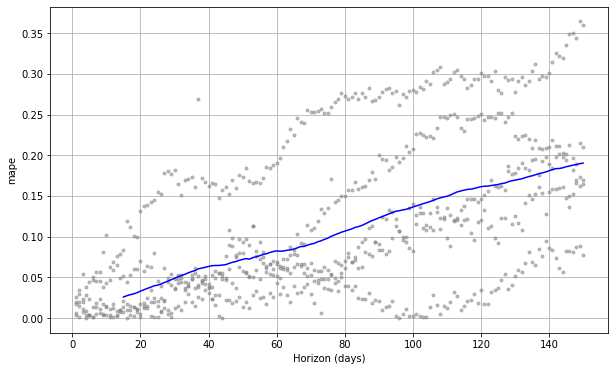

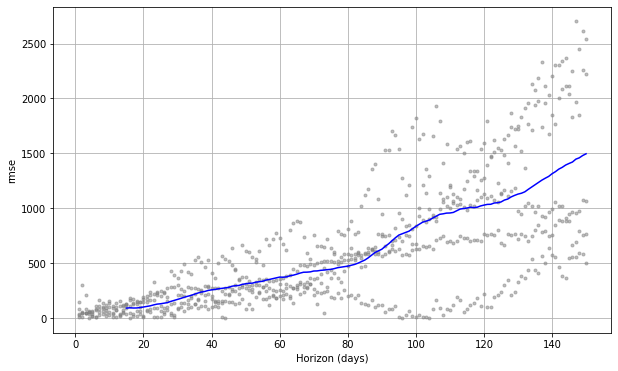

In [276]:
from fbprophet import Prophet
import pandas as pd
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric


df_p = performance_metrics(df_cv)
plt.figure(figsize=(15,15))

print("Performance Metric of the FBprophet library according the parameters above\n")
print(df_p)
print("For a horizon of 100 days, we have SMAPE = ", np.square(df_p['mape'][0]))
fig = plot_cross_validation_metric(df_cv, metric='mape')
fig = plot_cross_validation_metric(df_cv, metric='rmse')

## Fitting testing and removal of old historical data

What we want to test here is whether the model can me improved (we have already broken the news to the reader) by cutting the first years off the data, as we have seen from the plot that the trend changes, illustrating that the inside of the black box which generated the time-series changes.

As we can see from the plots bellow, by removing the first year, we have superior forecast than by removing 2 years or not removing anything.

INFO:fbprophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.
INFO:fbprophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.



~~~New Test Suite~~~
Lower_bound: 0
Upper_bound: 1200
Forecast horizon 157
MAE: 982.932042201047
RMSE: 1243.952727873351
MSE: 1547418.3891835515
SMAPE Error: 5.137665556562615%
Mean log error:  0.04682002262072623


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.



~~~New Test Suite~~~
Lower_bound: 360
Upper_bound: 1200
Forecast horizon 157
MAE: 467.864305433305
RMSE: 613.3329303738778
MSE: 376177.283481008
SMAPE Error: 2.5404783818178056%
Mean log error:  -0.009910295336220423

~~~New Test Suite~~~
Lower_bound: 720
Upper_bound: 1200
Forecast horizon 157
MAE: 968.2165098573985
RMSE: 1078.7954743726723
MSE: 1163799.675526959
SMAPE Error: 5.213305269459466%
Mean log error:  0.04969437449082874


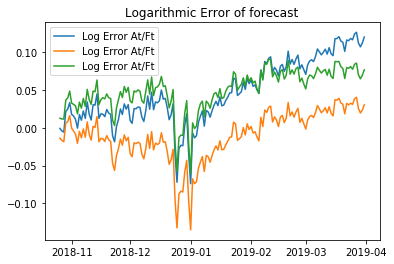

In [281]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

iterations = [[0,1200], [360, 1200], [720, 1200] ]
forecast_horizon = 157

def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

def log_err(A, F):
    return (np.log(A/F))

def test_suit(lower_bound, upper_bound, forecast, test_sample):
    print("\n~~~New Test Suite~~~")
    print("Lower_bound:", lower_bound)
    print("Upper_bound:", upper_bound)
    print("Forecast horizon", forecast_horizon)
    yhat = forecast['yhat'][upper_bound - lower_bound:]
    yhat = np.asarray(yhat)
    test_array = np.asarray(test_sample)

    mse = mean_squared_error(test_array, yhat)
    mae = mean_absolute_error(test_array, yhat)
    print("MAE:", mae)
    print("RMSE:", np.sqrt(mse))
    print("MSE:", mse)


    smape_error = smape(test_array, yhat)
    print('SMAPE Error:', str(smape_error) + '%')

    log_error = log_err(test_array, yhat)
    plt.plot(forecast['ds'][upper_bound - lower_bound:], log_error, label = "Log Error At/Ft")
    plt.title("Logarithmic Error of forecast")
    plt.legend()

    print( "Mean log error: ", np.mean(log_error))



for iteration in iterations:
    lower_bound = iteration[0]
    upper_bound = iteration[1]
    train_sample = pd.DataFrame({'y': df['device_count'][lower_bound:upper_bound], 'ds': df.index[lower_bound:upper_bound] })
    train_sample = train_sample.reset_index()
    del train_sample['date']
    train_sample.head()
    test_sample = df['device_count'][upper_bound:]
    
    p = Prophet(weekly_seasonality=False, changepoint_prior_scale=0.1)
    p.add_seasonality(name='daily', period=7, fourier_order=15, mode = 'multiplicative')
    p.fit(train_sample)
    future = p.make_future_dataframe(forecast_horizon, freq='D')
    forecast = p.predict(future)
    test_suit(lower_bound, upper_bound, forecast, test_sample)
    
    


## Forecasting using Exponential smoothing

Since the `theta model` is not available in python, although it is under active development, we will be using the second family of statistical methods that produce very promising results, that of Exponential Smoothing. From the analysis bellow we see that by removing the seasonality and the performing ETS on the trend, we actually get better performance than by applying ETS right away on the data. This is because, seasonality works as *noice* for the ETS model and it confuses the algorithm, which tries to understand how the trend works. Moreover, by adding back the seasonal component, we ensure that no important information is lost and thus we have a very accurate prediction.

In effect, we test 2 different Exponential Smoothing methods:

1. We perform Simple Exponential Smoothing without  removing the seasonal component
2. We perform Holt Exponential smoothing on the trend and then re-seasonalise the time-series in order to find the forecasted values

It is worth noting that this accuracy is comparable to `fbprophet`, if not better. We use different models which have been proven to be more precise than linear ones. The problem with these models is that they can't be applied to all time-series and they need calibration in order to acieve accuracy, while a library as `fbprophet` allowes the data scientist to get forecasts with very good accuracy without spending any time in optimizing the model.

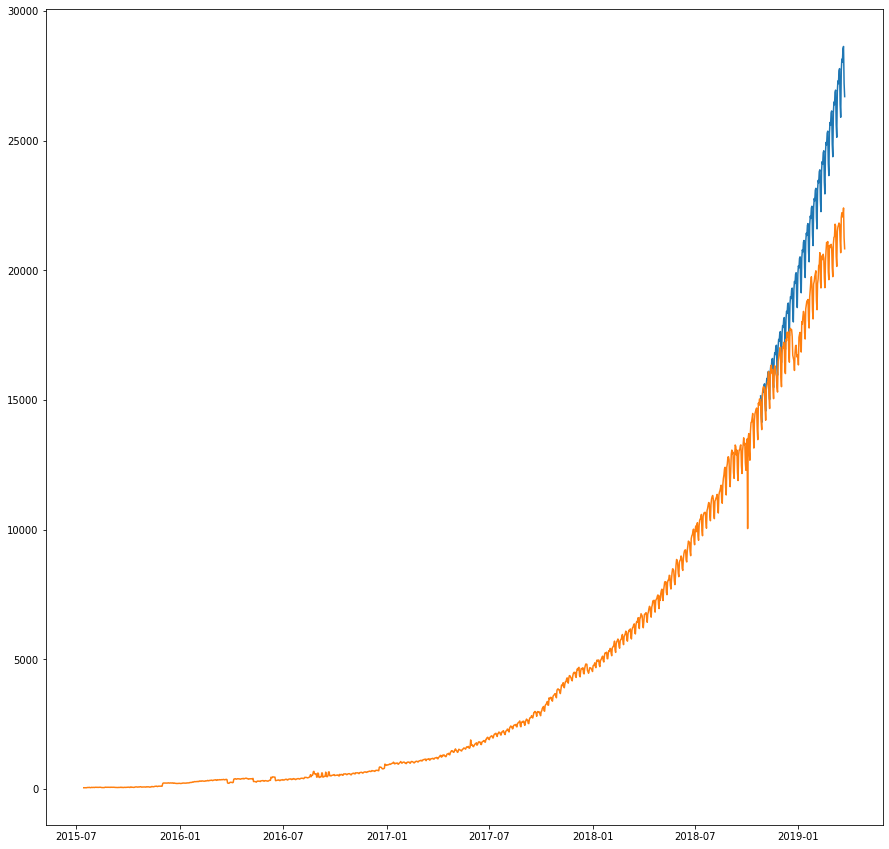

In [338]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import pandas as pd

limit = 1357
upper_bound = 1200
lower_bound = 360
forecast_horizon = 150


train_sample = pd.DataFrame({'y': df['device_count'][lower_bound:upper_bound], 'ds':df.index[lower_bound:upper_bound] })
train_sample = train_sample.reset_index()
del train_sample['date']

test_sample = pd.DataFrame({'y': df['device_count'][upper_bound:upper_bound + forecast_horizon], 'ds':df.index[upper_bound:upper_bound + forecast_horizon] })
test_sample = test_sample.reset_index()
del test_sample['date']

sample_array = np.asarray(train_sample['y'])
test_array = np.asarray(test_sample['y'])

model = ExponentialSmoothing(sample_array, trend='mul', seasonal='mul', seasonal_periods=7)
model_fit = model.fit(use_brute=True)
# yhat = model_fit.predict(start = upper_bound, end = upper_bound + forecast_horizon)

future_range = pd.date_range(start = df.index[upper_bound], end = '2021-01', freq  = 'D')
plt.figure(figsize=(15,15))

yhat = model_fit.forecast(forecast_horizon)
plt.plot(future_range[:forecast_horizon], yhat)

# print(future_range)


plt.plot(df.index[:upper_bound + forecast_horizon], df['device_count'][0:upper_bound + forecast_horizon])
# plt.plot(future_range[:forecast_horizon+1], yhat)

Error for a forecast horizon of 150 samples
RMSE: 3138.1101057339665
MSE: 9847735.035709647
MAE: 2563.2182793046877
SMAPE Error: 12.060993942176363%
MAPE Error: 13.165252468312271%
Mean log error:  -0.12056900038590039


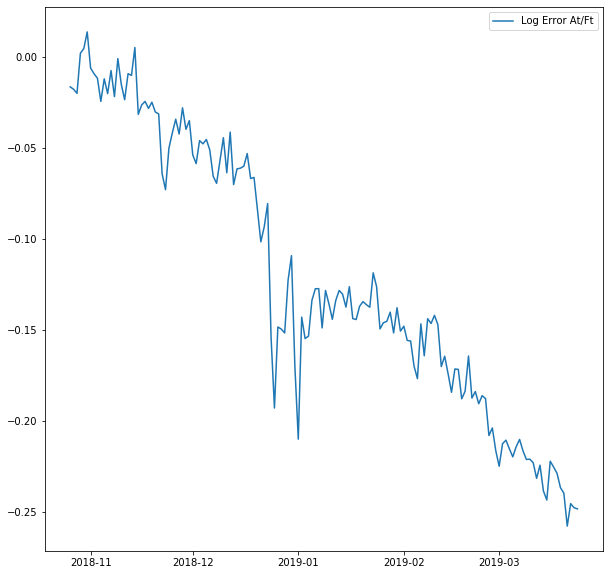

In [341]:
# Test suite

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.figure(figsize=(10,10))

print("Error for a forecast horizon of", forecast_horizon, "samples" )



mse = mean_squared_error(test_array, yhat)
mae = mean_absolute_error(test_array, yhat)
print("RMSE:", np.sqrt(mse))
print("MSE:", mse)
print("MAE:", mae)

def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

smape = smape(test_array, yhat)
mape = mean_absolute_percentage_error(test_array, yhat)
print('SMAPE Error:', str(smape) + '%')
print('MAPE Error:', str(mape) + '%')

def log_err(A, F):
    return (np.log(A/F))


log_error = log_err(test_array, yhat)
plt.plot(future_range[:forecast_horizon], log_error, label = "Log Error At/Ft") 
plt.legend()

print( "Mean log error: ", np.mean(log_error))

In [350]:
# out of sample = 57 last valuesfrom sklearn.metrics import mean_squared_error

errors = test_array-yhat
errors = pd.DataFrame(errors)
print (model_fit.summary())



                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                  840
Model:             ExponentialSmoothing   SSE                       19659887.638
Optimized:                         True   AIC                           8472.979
Trend:                   Multiplicative   BIC                           8525.046
Seasonal:                Multiplicative   AICC                          8473.419
Seasonal Periods:                     7   Date:                 Sat, 11 Apr 2020
Box-Cox:                          False   Time:                         20:10:27
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.2631579                alpha                 True
smoothing_slope          

               y         ds
0     369.857143 2016-07-08
1     372.000000 2016-07-09
2     373.142857 2016-07-10
3     375.714286 2016-07-11
4     378.000000 2016-07-12
..           ...        ...
635  6621.285714 2018-04-04
636  6651.571429 2018-04-05
637  6691.142857 2018-04-06
638  6703.857143 2018-04-07
639  6733.000000 2018-04-08

[640 rows x 2 columns]
Weekday: 0
Seasonal Weekday: 6
6767.618986073195


/usr/local/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



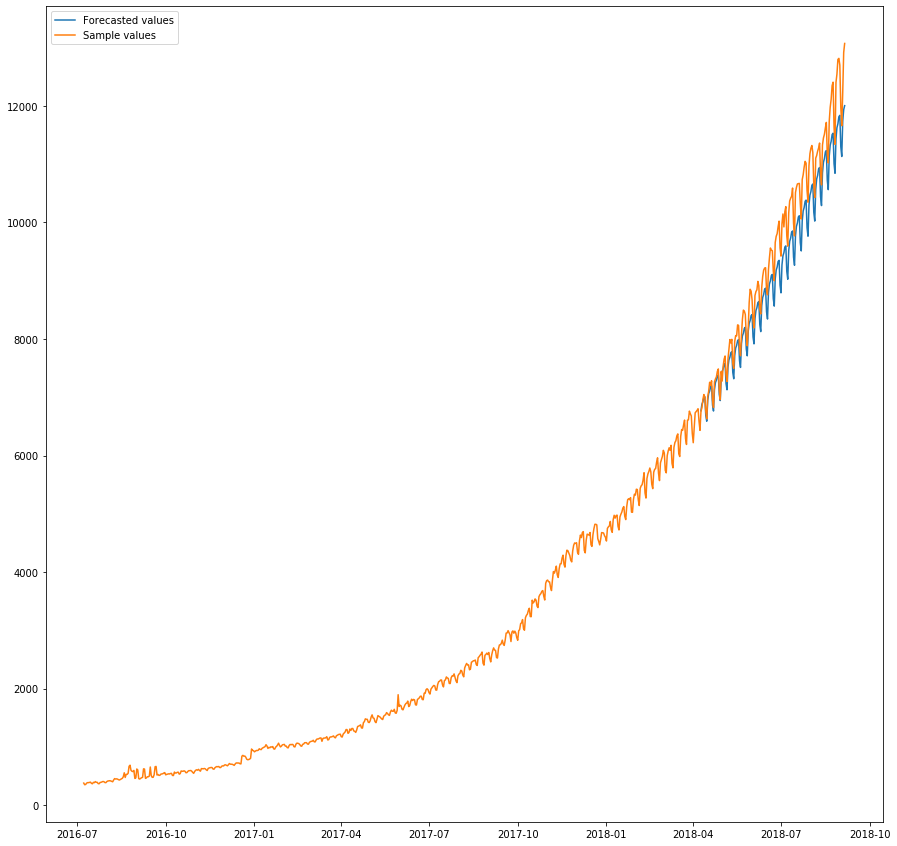

In [366]:
# compute error for holt-winters

from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, HoltWintersResults
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose


dec_m = seasonal_decompose(series, model='multiplicative')
si = dec_m.seasonal
tr = dec_m.trend

limit = 1356
upper_bound = 1000
lower_bound = 360
forecast_horizon = 150


train_sample = pd.DataFrame({'y': tr[lower_bound:upper_bound], 'ds':df.index[lower_bound:upper_bound] })
train_sample = train_sample.reset_index()
del train_sample['date']
if lower_bound == 0:
    train_sample['y'][lower_bound + 0:lower_bound + 3] = series[lower_bound + 0:lower_bound + 3]/si[lower_bound + 0:lower_bound + 3]
    train_sample['y'][upper_bound - lower_bound - 2:upper_bound - lower_bound] = series[upper_bound - lower_bound - 2:upper_bound - lower_bound]/si[upper_bound - lower_bound - 2:upper_bound - lower_bound]

print(train_sample)

test_sample = pd.DataFrame({'y': df['device_count'][upper_bound:upper_bound + forecast_horizon ], 'ds':df.index[upper_bound:upper_bound + forecast_horizon ] })
test_sample = test_sample.reset_index()
del test_sample['date']
sample_array = np.asarray(train_sample['y']) 

# De-seasonalized
test_array = np.asarray(test_sample['y']) / np.asarray(si[upper_bound:upper_bound + forecast_horizon ])

# print(sample_array)

model2 = Holt(sample_array, exponential = True)
model_fit2 = model2.fit(smoothing_level =0.7)

# print("seasonal_component size: ", seasonal_component.size)

# yhat = model_fit2.predict(start = 1000,  end =  1400)*seasonal_component[0:401]
yhat = model_fit2.forecast(forecast_horizon)
offset = 5
yhat = yhat * si[upper_bound: upper_bound + forecast_horizon] 

future_range = pd.date_range(start = df.index[0], end = '2021-01-01', freq  = 'D')

print("Weekday:", future_range[upper_bound].weekday()) 

# monday = 0, sunday = 6

print("Seasonal Weekday:", si.index[0 + offset].weekday())

print(yhat[0])

# print(future_range)

# plt.plot(df.index[:], df['device_count'][:])
plt.figure(figsize=(15,15))

plt.plot(future_range[upper_bound:upper_bound + forecast_horizon], yhat, label = "Forecasted values")
plt.plot(df.index[0 + lower_bound:upper_bound + forecast_horizon], df['device_count'][0 + lower_bound:upper_bound + forecast_horizon] , label = "Sample values")
# plt.plot(df.index[upper_bound:upper_bound + forecast_horizon], test_array, label = "Out-sample values for testing")
plt.legend()
# sample_array.size
# yhat.size

In [367]:
# Export the Holt data to measure prediction intervals with R

df_to_export1 = pd.DataFrame({
    "yhat": yhat,
    "test_array": test_array}
)
df_to_export2 = pd.DataFrame({
    "sample_array": sample_array
})

df_to_export1.to_csv(r'test_array.csv')
df_to_export2.to_csv(r'sample_array.csv')


Error for a forecast horizon of 300 samples
RMSE: 707.8857298519551
MSE: 501102.2065280352
MAE: 537.4862919332954
SMAPE Error: 4.234051874808846%
MAPE Error: 4.201914093568901%
Mean log error:  0.019611042683419892


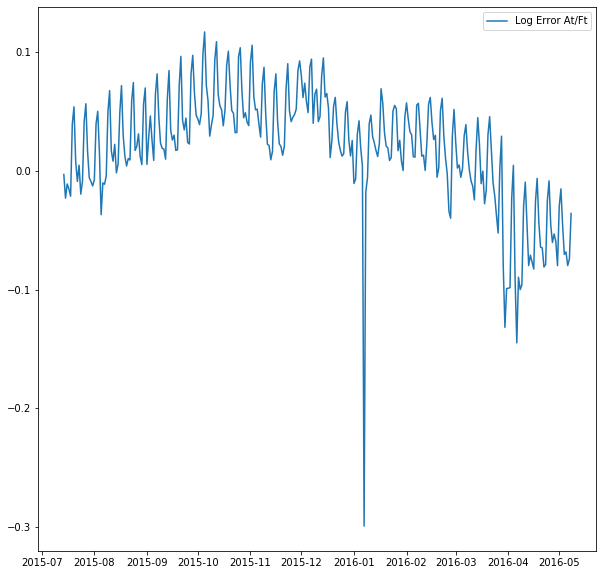

In [360]:
# Test suite

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.figure(figsize=(10,10))

print("Error for a forecast horizon of", forecast_horizon, "samples" )



mse = mean_squared_error(test_array, yhat)
mae = mean_absolute_error(test_array, yhat)
print("RMSE:", np.sqrt(mse))
print("MSE:", mse)
print("MAE:", mae)

def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

smape = smape(test_array, yhat)
mape = mean_absolute_percentage_error(test_array, yhat)
print('SMAPE Error:', str(smape) + '%')
print('MAPE Error:', str(mape) + '%')

def log_err(A, F):
    return (np.log(A/F))


log_error = log_err(test_array, yhat)
plt.plot(future_range[:forecast_horizon], log_error, label = "Log Error At/Ft") 
plt.legend()

print( "Mean log error: ", np.mean(log_error))

## Test suite Results

Above we run our very own test suite and has produced some very interesting results. We see that we have a `Mean Average Error` of 537 devices, which is very acceptable given the size of the fleets and the load that the VPN servers can manage.

In [353]:
from statsmodels.tsa.holtwinters import HoltWintersResults

# model2 = Holt()
# model2_fit = model2.fit()

model_fit2.summary()

Dep. Variable:,endog,No. Observations:,640
Model:,Holt,SSE,44399.062
Optimized:,True,AIC,2721.283
Trend:,Multiplicative,BIC,2739.129
Seasonal:,None,AICC,2721.416
Seasonal Periods:,None,Date:,"Sat, 11 Apr 2020"
Box-Cox:,False,Time:,20:10:38
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.7000000,alpha,False
smoothing_slope,0.7000000,beta,True


For the prediction intervals, we used R as shown bellow. Python did not offer any library that facilitated the creation of PI, after many hours of research, we opted to use R instead of writing our own functions in order to measure the prediction intervals.

We will be finding the `Prediction Intervals` only for the second method, the `Holt`, since it is more accurate than the `Simple Exponential Smoothing`. 

In [ ]:
# R code

library("ggplot2")
library("forecast")
library("fpp")

sampled <- read.csv("/Users/odys/Github/forecasting-course-project/sample_array.csv")
testd <- read.csv("/Users/odys/Github/forecasting-course-project/test_array.csv")


usable.data <- data.frame( 
  "airPassengers" = NA, 
  "power" = NA, 
  "wind" = NA
)

test.data <- data.frame( 
  "airPassengers" = NA, 
  "power" = NA, 
  "wind" = NA
)

for (item in dat[,1]){
  data = as.vector(strsplit(item, ";")[[1]])
  usable.data <- rbind(usable.data, data)
  
}

for (item in dat.test[,1]){
  data = as.vector(strsplit(item, ";")[[1]])
  test.data <- rbind(test.data, data)
  
}
usable.data <- usable.data[-1, ]
test.data <- test.data[-1, ]


air.ts = ts(sampled$sample_array, frequency = 7)
dec = decompose(air.ts, type = "multiplicative")

seasonality = dec$seasonal
trend = air.ts/seasonality

forecast1 = holt(trend, h = 150, type = "multiplicative")
forecast2 = forecast(ets(air.ts), h = 150)
forecast3 = holt(trend, h = 150, damped = TRUE, type = "multiplicative")

nfm = (forecast1$mean - testd$test_array)/ (forecast1$mean + testd$test_array)
# nfm = [-1, +1] -1 = underforecast, +1 = over-forecast
# 
aggregate(nfm)

out_sample = c(testd$test_array)
sqrt(mean(forecast1$fitted*seasonality - sampled$sample_array) ^2)
sqrt(mean(forecast1$mean*as.numeric(tail(seasonality, 150)) - out_sample) ^2)

sqrt(mean(forecast2$fitted*seasonality - sampled$sample_array) ^2)
sqrt(mean(forecast2$mean*as.numeric(tail(seasonality, 150)) - out_sample) ^2)

sqrt(mean(forecast3$fitted*seasonality - sampled$sample_array) ^2)
sqrt(mean(forecast3$mean*as.numeric(tail(seasonality, 150)) - out_sample) ^2)

pi.1 = forecast1$upper - forecast1$lower
pi.2 = forecast2$upper - forecast2$lower
pi.3 = forecast3$upper - forecast3$lower

between85 <- c()
between95 <- c()
count95 <- 0
count85 <- 0
true.percent95 <-b

for(i in seq_along(c(1:150)) ){
  low <- forecast1$lower[i,]*tail(seasonality,150)[i]
  high <- forecast1$upper[i,]*tail(seasonality,150)[i]
  test <- testd$test_array[i]
  between85[i] <- FALSE
  between95[i] <- FALSE
  if (low[1] < test && test < high[1]){
    between85[i] <- TRUE
    count85 <- count85 + 1
  }
  if (low[2] < test && test < high[2]){
    between95[i] <- TRUE
    count95 <- count95 + 1
  }
  
}
count85/150*100
count95/150*100

plot(as.numeric(testd$test_array), type = "l")
lines(as.numeric(forecast1$lower[,1]*as.numeric(tail(seasonality,150))), col = "red")
lines(as.numeric(forecast1$upper[,1]*as.numeric(tail(seasonality,150))), col = "blue")



## Prediction Interval plot from the R code

From the code above and finding the prediction intervals for the Holt method, we conclude with the plot bellow. Moreover, we find that over 96% and 99% fall into the 85% and 95% `P.I` respectively.

![](prediction_intervals.png)

# Machine Learning

In this section ,we opted to use a simple Neural Network in order to do forecast. The interesting part of the Neural Network is that it had consistently worse performance than the statistical methods, although it was much easier to construct, since we only cared to create the framework and then all the optimization is handled by the network. We made some optimizations, like increasing the number of `neurons` while also allowing the network to run many times, which meant that each iteration would use the `weights` from the last iteration. Although this was somewhat succesful, reducing the `SMAPE` from 9% to arround 4%, it was very computational heavy. This showcases what has been shown many times in the Makridakis Competition, that machine learning methods are vastly more computational heavy than statistical ones and achieve only a slight improvement in accuracy. Of course the statistical methods have to be calibrated for each data set and each problem in order to be accurate while the machine learning is more *fire and forget*, meaning that as soon as we have created the network and defined the parameters, we can feed it any type of data and it will be able to find the associations.

/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

11.98321006602304


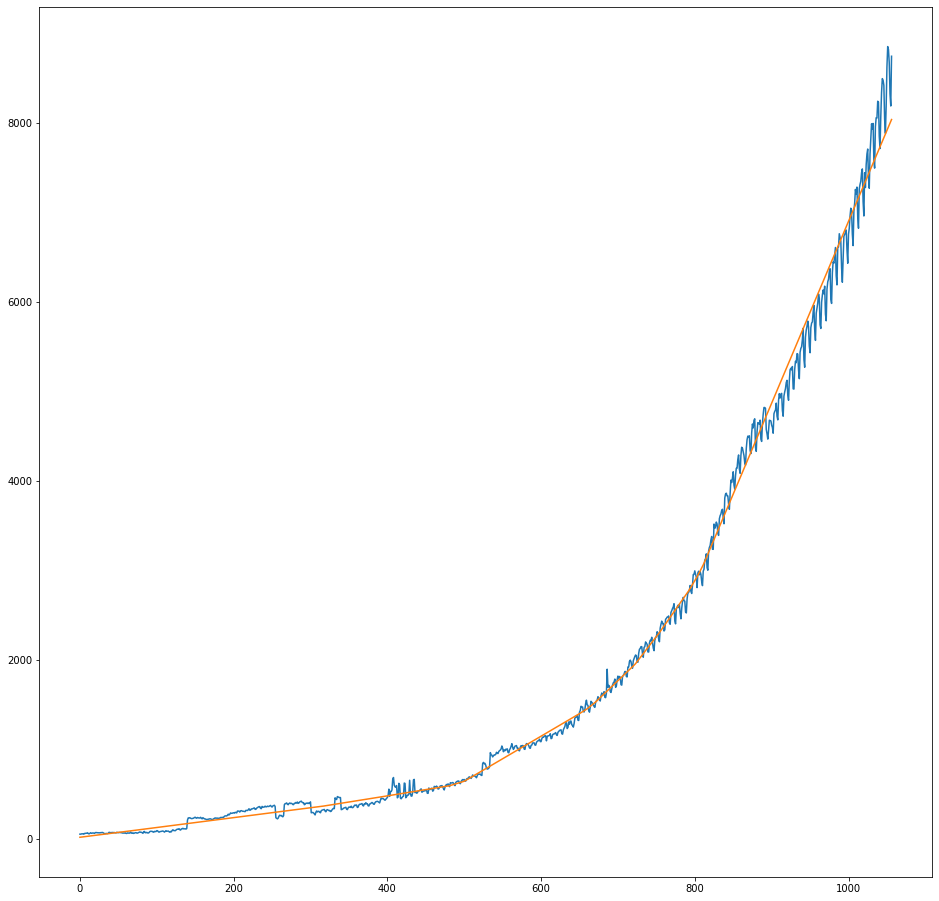

In [368]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor

forecast_horizon = 300
insample = df.iloc[:-forecast_horizon, :]

x_train = np.asarray(insample.index)
x_train = x_train.reshape(-1,1)

y_train = np.asarray(insample['device_count'])
y_train = y_train.reshape(-1,1)


outsample = df.iloc[:-forecast_horizon:, :]
x_test = np.asarray(outsample.index)
x_test = x_test.reshape(-1,1)

y_test = np.asarray(outsample['device_count'])
y_test = y_test.reshape(-1,1)

scaler_input = MinMaxScaler(feature_range=(0,1))
scaler_output = MinMaxScaler(feature_range=(0,1))

x_train = scaler_input.fit_transform(x_train)
x_test = scaler_input.transform(x_test)

y_train = scaler_output.fit_transform(np.reshape(y_train, (-1,1)))
#We run 10 iterations
for i in range(10):
    mlp = MLPRegressor(hidden_layer_sizes = (100,100), activation = 'relu', early_stopping=True, warm_start=True)
    mlp.fit(x_train, y_train)
    y_hat_mlp = mlp.predict(x_test)
    y_hat_mlp = scaler_output.inverse_transform(np.reshape(y_hat_mlp, (-1,1)))
print(np.mean(200 * np.abs(y_hat_mlp - y_test)/ (np.abs(y_hat_mlp) + np.abs(y_test))).item() )

# We run the model several tiems and set the warm_start=True so that with each iteration
# them model gets better. This is done to increase accuracy.
# The experiment is proven to be correct as we manage to bring SMAPE down to 9.95, relatively close to the
# exponential smoothing that we run before.
plt.figure(figsize=(16,16))
plt.plot(y_test)
plt.plot(y_hat_mlp)




Error for a forecast horizon of 300 samples
RMSE: 707.8857298519551
MSE: 501102.2065280352
MAE: 537.4862919332954
SMAPE Error: 4.234051874808846%
MAPE Error: 4.201914093568901%
Mean log error:  0.019611042683419892


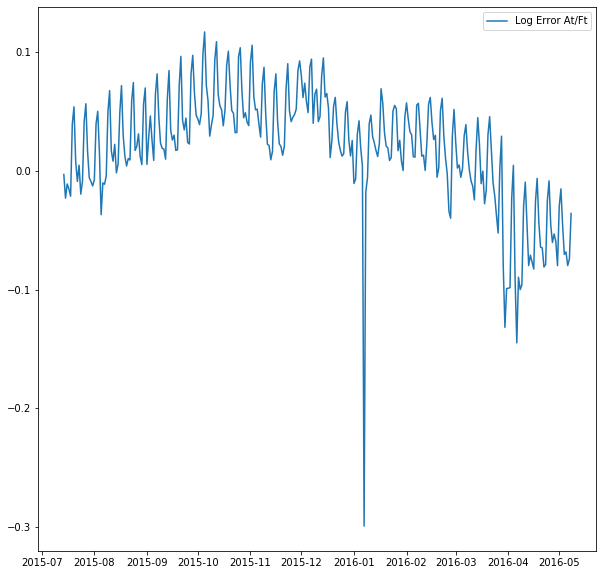

In [365]:
# Test suite

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.figure(figsize=(10,10))

print("Error for a forecast horizon of", forecast_horizon, "samples" )



mse = mean_squared_error(test_array, yhat)
mae = mean_absolute_error(test_array, yhat)
print("RMSE:", np.sqrt(mse))
print("MSE:", mse)
print("MAE:", mae)

def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

smape = smape(test_array, yhat)
mape = mean_absolute_percentage_error(test_array, yhat)
print('SMAPE Error:', str(smape) + '%')
print('MAPE Error:', str(mape) + '%')

def log_err(A, F):
    return (np.log(A/F))


log_error = log_err(test_array, yhat)
plt.plot(future_range[:forecast_horizon], log_error, label = "Log Error At/Ft") 
plt.legend()

print( "Mean log error: ", np.mean(log_error))

## Conclusions


The conclusions are direct and indirect of this analysis. Regarding the samples, although the project here is presented with a forecast horizon of `150` samples, the same conclusion can be drawn with a wider forecast horizon, say `300`. The reasoon we chose `150` was that we have about 1357 data samples, thus we wanted to give as many data points to the fitting set in order to train the algorithms as good as possible, especially given that the `trend` component of the time-series changes in the middle of the sample and thus the model would greatly suffer if we cut more data points near the recent past and biasing our dataest towards the past.

Regarding the forecasting methodologies, it was apparent that although machine learning was easy to setup, the computational requirements hardly make it worth, while we can achieve the same or slightly better forecasts using `exponential smoothing`. This point would be even more re-enforced had we used the `theta method`, which is proven to be the most accurate statistical forecasting method to date.


### Direct

1. We now have an adequate model that can be the basis of the VPN server provisioning scheme, meaning that the system will be able to anticipate the load and provision Virtual Machines to serve that load.


### Indirect
2. We have verified, with the seasonality analysis, that although there are **a lot** of hobbyists who use our platform, the majority of devices come from businesses, and thus the system is prone to a business-like, workday, seasonality.

### The next steps

I plan to present the findings here internally, so that we can start building a forecasting model for the backend systems that can serve as a tool for the reliability engineers. 

 - Present findings
 - Create proof of concept model that works on a daily basis and gives feedback to the backend servers
 - Optimise model for better accuracy
 - Mutate model to be able to accomodate other systems than the backend VPN
 - Explore the application of the M4 winner model, a statistical-machine learning hybrid